In [1]:
#importing some neccessary modules

import pandas as pd
import numpy as np
from numpy import random
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import re

In [38]:
# assigning values according to the 

ref_values = {
    1:"Transitional",
    2:"Commercial",
    3:"Navigational",
    4:"Informational",
}

In [4]:
# reading different sheets of data 1 by 1

df1 = pd.read_excel("/Users/deepanshu/Downloads/Keyword_Intent Data.xlsx")
df1["target"]=1
df1

,Keyword,Position,target
0,plus size red formal dresses,2.0,1
1,cheap prom dresses,8.0,1
2,mother bride dress designers,2.0,1
3,slny dresses,3.0,1
4,plus size black formal dresses,7.0,1
...,...,...,...
10012,white lace two piece dress,59.0,1
10013,portrait collar evening gown,42.0,1
10014,elegant women's dress,14.0,1
10015,semi formal pant suits for women,4.0,1


In [6]:
df2 = pd.read_excel("/Users/deepanshu/Downloads/Keyword_Intent Data.xlsx",sheet_name=1)
df2["target"]=2
df2

,Keyword,Position,target
0,quince dresses,4.0,2
1,prom dress shops,8.0,2
2,mother of the groom dresses,13.0,2
3,two piece prom dresses,4.0,2
4,dresses for winter balls,1.0,2
...,...,...,...
10115,short dress with bow in back,89.0,2
10116,purple taffeta dress,11.0,2
10117,formal short dresses plus size,16.0,2
10118,2 piece prom dresses 2021,5.0,2


In [9]:
df3 = pd.read_excel("/Users/deepanshu/Downloads/Keyword_Intent Data.xlsx",sheet_name=2)
df3["target"]=3
df3

,Keyword,Position,target
0,candy couture,1.0,3
1,candycouture,1.0,3
2,jovani,4.0,3
3,jovani dresses,4.0,3
4,mac duggal,6.0,3
...,...,...,...
1619,NaN,NaN,3
1620,duggal photo printing,71.0,3
1621,sweetheart wedding chapel las vegas,80.0,3
1622,lee's fashions myshopify,23.0,3


In [13]:
df4 = pd.read_excel("/Users/deepanshu/Downloads/Keyword_Intent Data.xlsx",sheet_name=3)
df4["target"]=4
df4

,Keyword,Position,target
0,are hi low dresses still in style,13.0,4
1,ariana grande long dress,64.0,4
2,ariana grande steal her style,13.0,4
3,attire for a cocktail party,43.0,4
4,balenciaga how to pronounce,67.0,4
...,...,...,...
1184,most popular prom dress colors,13.0,4
1185,is homecoming the same as prom,13.0,4
1186,what are the trends for prom 2022,17.0,4
1187,does sherri hill run small,67.0,4


In [14]:
print(df1.shape,
df2.shape,
df3.shape,
df4.shape)


(10017, 3) (10120, 3) (1624, 3) (1189, 3)


In [ ]:
# !st approach , accuracy - 62% , 22950 rows × 3 columns
# main_df = df2.append([df3,df1,df4]) 

In [15]:
# 2st approach with apprax with same data for every case , accuracy - 67% 



#merge all the sheets in one dataframe
main_df = df4.append([df3,df1[:1600],df2[:1600]])

In [16]:
main_df

,Keyword,Position,target
0,are hi low dresses still in style,13.0,4
1,ariana grande long dress,64.0,4
2,ariana grande steal her style,13.0,4
3,attire for a cocktail party,43.0,4
4,balenciaga how to pronounce,67.0,4
...,...,...,...
1595,black prom dress 2022,4.0,2
1596,dark red bridesmaid dresses,22.0,2
1597,plus size wedding jumpsuit,97.0,2
1598,pink plus size prom dresses,3.0,2


In [18]:
# dropping unnecessary columnn from dataset
main_df = main_df.drop(['Position'], axis=1)
main_df

,Keyword,target
0,are hi low dresses still in style,4
1,ariana grande long dress,4
2,ariana grande steal her style,4
3,attire for a cocktail party,4
4,balenciaga how to pronounce,4
...,...,...
1595,black prom dress 2022,2
1596,dark red bridesmaid dresses,2
1597,plus size wedding jumpsuit,2
1598,pink plus size prom dresses,2


In [19]:
# shuffling the data so we can take out randomly for test and train 
main_df = main_df.sample(frac=1)

In [20]:
main_df[:10]

,Keyword,target
876,la femme red prom dress,4
1251,short pink prom dresses,1
174,elegant mother bride dresses,2
113,mac dougal,3
88,js collections,3
985,t724,3
678,black prom dress with slit,1
510,sparkly gowns,3
1223,dresses for a wedding reception,2
788,strapless gowns,2


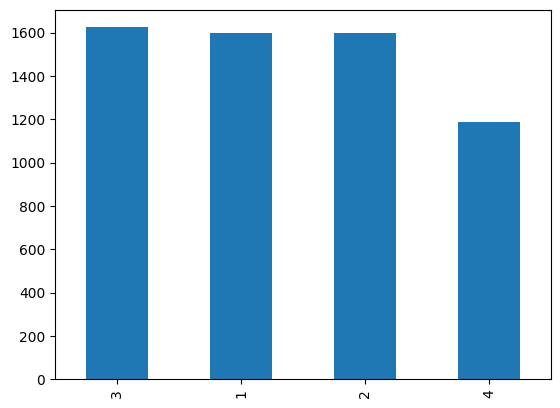

In [21]:
main_df.target.value_counts().plot(kind='bar');

In [23]:

REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')


In [24]:
from bs4 import BeautifulSoup

In [25]:
def clean_text(text):
    
    text = BeautifulSoup(text, "lxml").text # HTML decoding
    text = text.lower() # lowercase text
    text = REPLACE_BY_SPACE_RE.sub(' ', text) # replace REPLACE_BY_SPACE_RE symbols by space in text
    text = BAD_SYMBOLS_RE.sub('', text) # delete symbols which are in BAD_SYMBOLS_RE from text
    text = ' '.join(word for word in text.split()) # delete stopwors from text
#     print(text)
    return text

In [27]:
# making keyword column as string as there are some integer values
main_df['Keyword'] = main_df['Keyword'].apply(str)

In [28]:
# apply the function to clean the text
main_df['Keyword'] = main_df['Keyword'].apply(clean_text)

In [32]:
#spliting into train and test data (testing 10% ,  training - 90%)
X = main_df.Keyword
y = main_df.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state = 42)

In [33]:
X_train.shape, y_test.shape

((5411,), (602,))

In [34]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer

In [35]:
from sklearn.linear_model import SGDClassifier

# using SGDClassifier
sgd = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42, max_iter=5, tol=None)),
               ])
sgd.fit(X_train, y_train)

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf',
                 SGDClassifier(alpha=0.001, max_iter=5, random_state=42,
                               tol=None))])

In [36]:
from sklearn.metrics import classification_report
y_pred = sgd.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred))

accuracy 0.6777408637873754
              precision    recall  f1-score   support

           1       0.56      0.52      0.54       159
           2       0.64      0.50      0.56       165
           3       0.72      0.93      0.81       164
           4       0.80      0.79      0.79       114

    accuracy                           0.68       602
   macro avg       0.68      0.69      0.68       602
weighted avg       0.67      0.68      0.67       602



In [47]:
# taking input from user 
check = input()

print(ref_values[sgd.predict([check])[0]])


what is seo
Informational
